Task-6

### Prediction Using Decision Tree Algorithm

* In this task we are given 'iris' dataset to perform Decision Tree Classifier Algorithm. From the given ‘Iris.csv’ dataset, we will create the Decision Tree classifier and visualize it graphically.

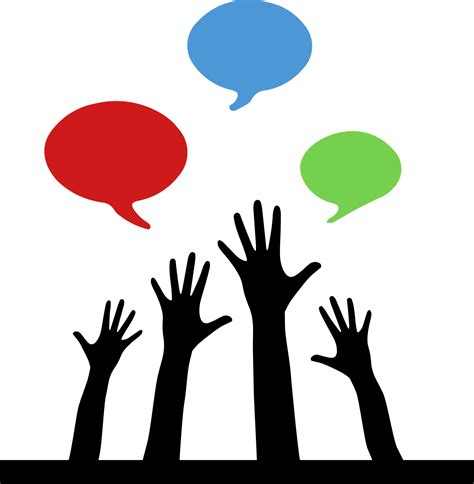

**GRIP Dec 23**

By Sri Ramya.K

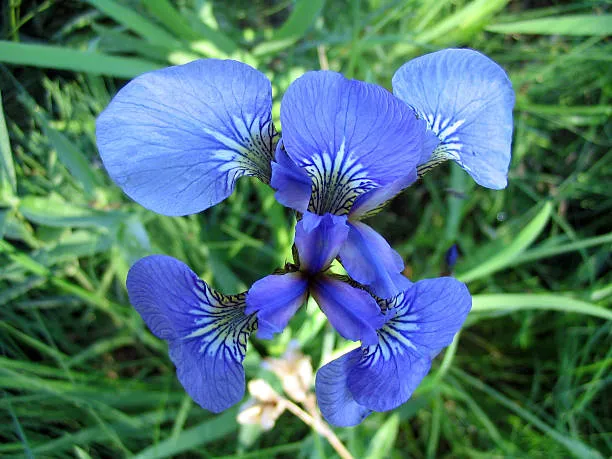

* This is the iris flower image we are working on with 3 different types in this dataset.

1.Iris Setosa,
2.Iris Versicolour,
3.Iris Virginica.

* Importing the required Libraries

In [82]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

* Loading Dataset

In [83]:
tree_df=pd.read_csv("Iris.csv")

In [84]:
#Input values of data
tree_df.columns.values

array(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'], dtype=object)

In [85]:
tree_df.shape

(150, 6)

In [86]:
tree_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [87]:
tree_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [88]:
tree_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [89]:
tree_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [90]:
#Checking for missing values
miss_val = tree_df.isna().sum()
miss_val

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

* Data processing

In [91]:
# Check if 'Id' column exists before dropping it
if 'Id' in tree_df.columns:
    tree_df.drop('Id', axis=1, inplace=True)

# Label encode
tree_df = tree_df.replace(to_replace={'Species': {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}})


In [92]:
tree_df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [93]:
tree_df['Species'].value_counts()


Species
0    50
1    50
2    50
Name: count, dtype: int64

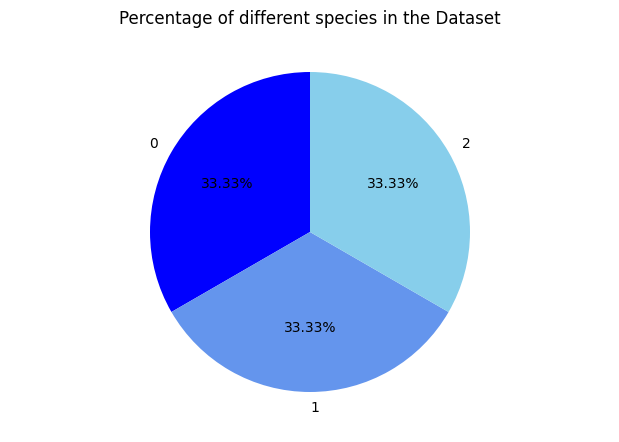

In [94]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
colors = ['blue','cornflowerblue','skyblue']
sp = tree_df['Species'].unique()
ct = tree_df['Species'].value_counts().tolist()
ax.pie(ct, labels = sp, autopct='%1.2f%%', colors=colors, startangle=90)
plt.title('Percentage of different species in the Dataset')
plt.show()

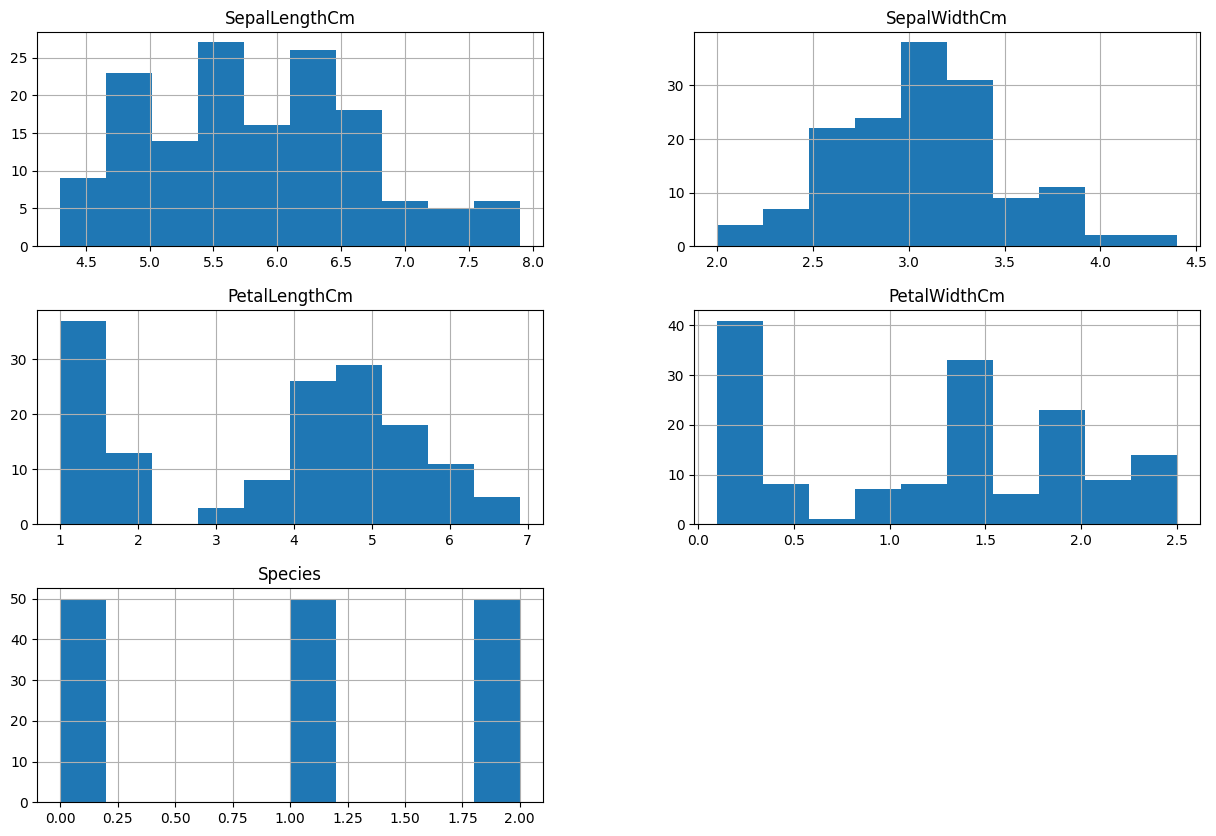

In [95]:
tree_df.hist()
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

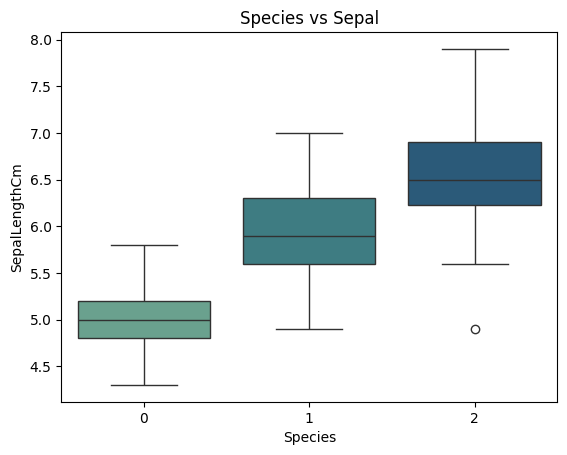

<Figure size 600x400 with 0 Axes>

In [96]:
sns.boxplot(x='Species', y='SepalLengthCm', data=tree_df, palette='crest')
plt.title('Species vs Sepal')

# Set the size of the figure (adjust width and height as needed)
plt.figure(figsize=(6, 4))

plt.show()


Text(0.5, 1.0, 'Species vs Sepal Width')

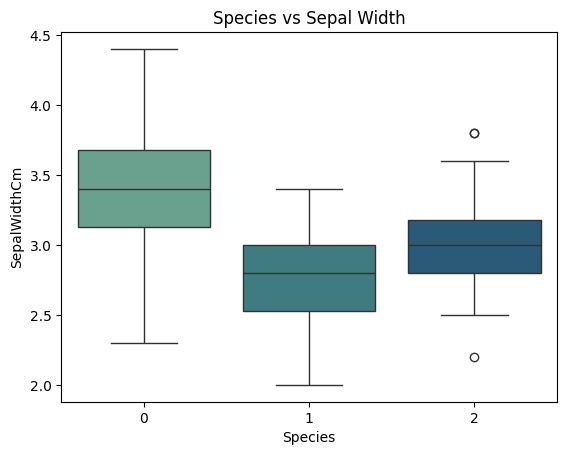

In [97]:
sns.boxplot(x='Species', y='SepalWidthCm', data=tree_df, palette='crest')
plt.title('Species vs Sepal Width')

Text(0.5, 1.0, 'Species vs Petal Length')

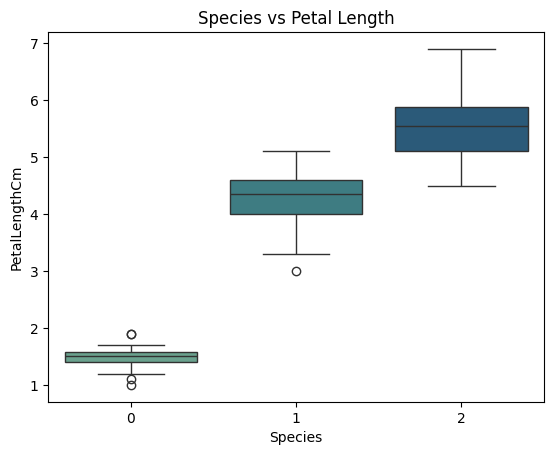

In [98]:
sns.boxplot(x='Species', y='PetalLengthCm', data=tree_df, palette='crest')
plt.title('Species vs Petal Length')

Text(0.5, 1.0, 'Species vs Petal Width')

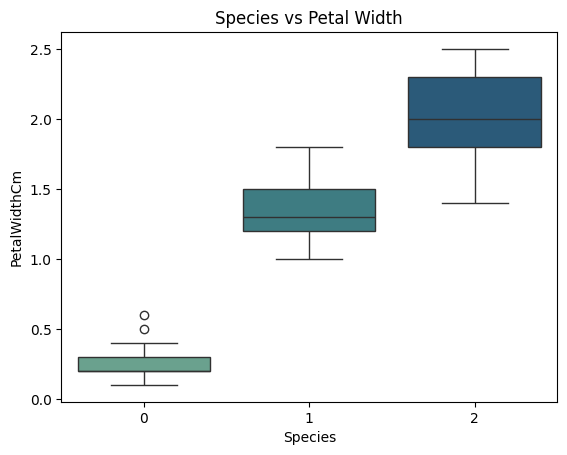

In [99]:
sns.boxplot(x='Species', y='PetalWidthCm', data=tree_df, palette='crest')
plt.title('Species vs Petal Width')

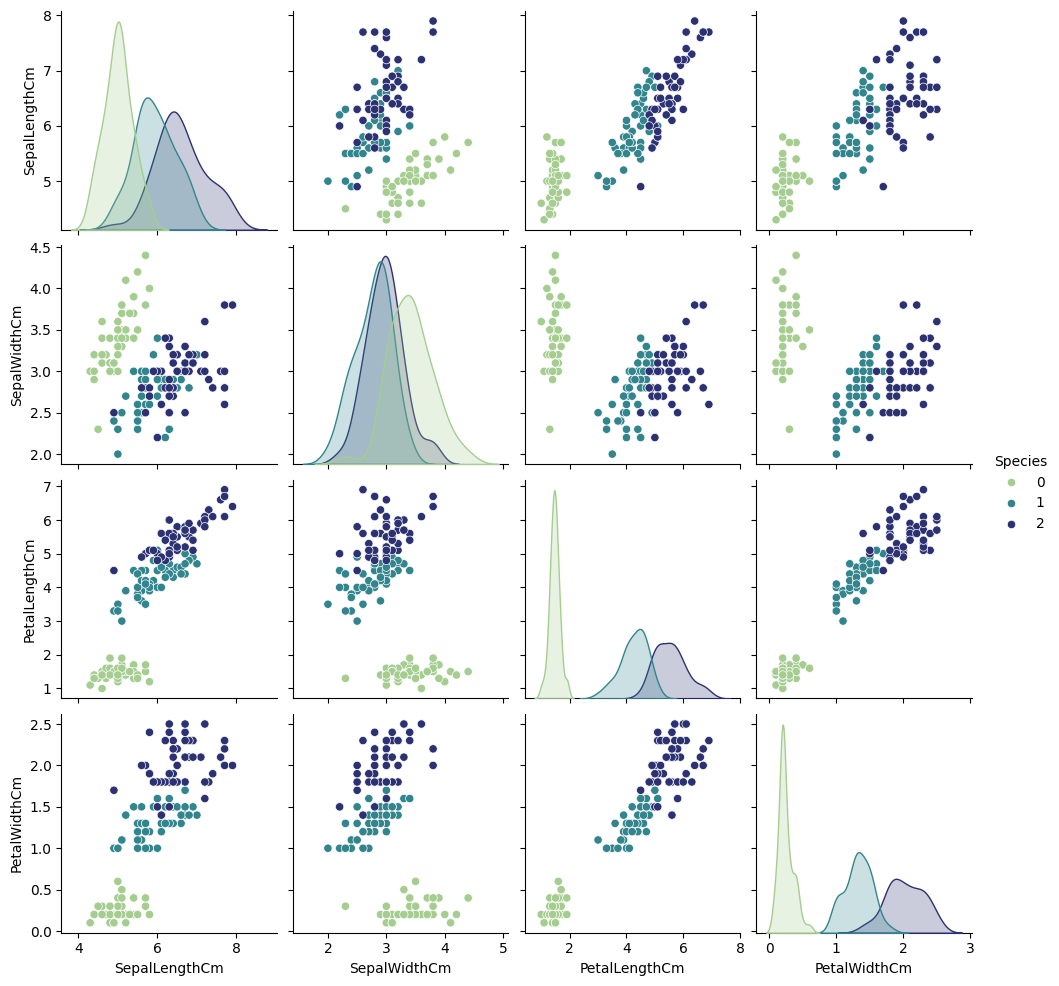

In [100]:
sns.pairplot(tree_df, hue = 'Species',palette='crest')
plt.show()

In [101]:
x=tree_df.drop("Species",axis=1)
x[0:5]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [102]:
y=tree_df["Species"]
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

* the class as 0, that is, setosa

In [103]:
#Splitting the data into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [104]:
x_train.shape
y_train.shape

(120,)

In [105]:
x_test.shape
y_test.shape

(30,)

In [106]:
from sklearn.tree import DecisionTreeClassifier
pred_tree=DecisionTreeClassifier(criterion="entropy",max_depth=5)
pred_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [107]:
pred=pred_tree.predict(x_test)

print(pred[0:5])
print(y_test[0:5])

[1 0 2 1 1]
73     1
18     0
118    2
78     1
76     1
Name: Species, dtype: int64


In [108]:
#Checking accuracy
from sklearn import metrics

print( "Accuracy: ", str(metrics.accuracy_score(y_test, pred)*100)+"%")

Accuracy:  100.0%


In [109]:
feature_names = tree_df.columns[:4]
target_names = tree_df['Species'].unique().tolist()
arget_names=['0','1','2']
feature_names

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

[Text(0.3076923076923077, 0.9166666666666666, 'x[3] <= 0.8\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.75, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.75, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.5833333333333334, 'x[3] <= 1.65\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.4166666666666667, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.5833333333333334, 'x[3] <= 1.75\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.4166666666666667, 'x[2] <= 4.95\nentropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.25, 'x[3] <= 1.55\nentropy = 0.918\nsamples = 6\nval

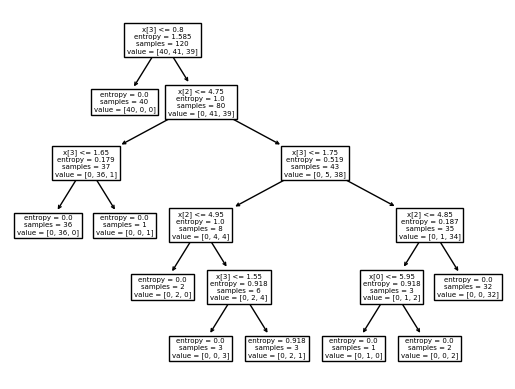

In [110]:
from sklearn import tree
tree.plot_tree(pred_tree)

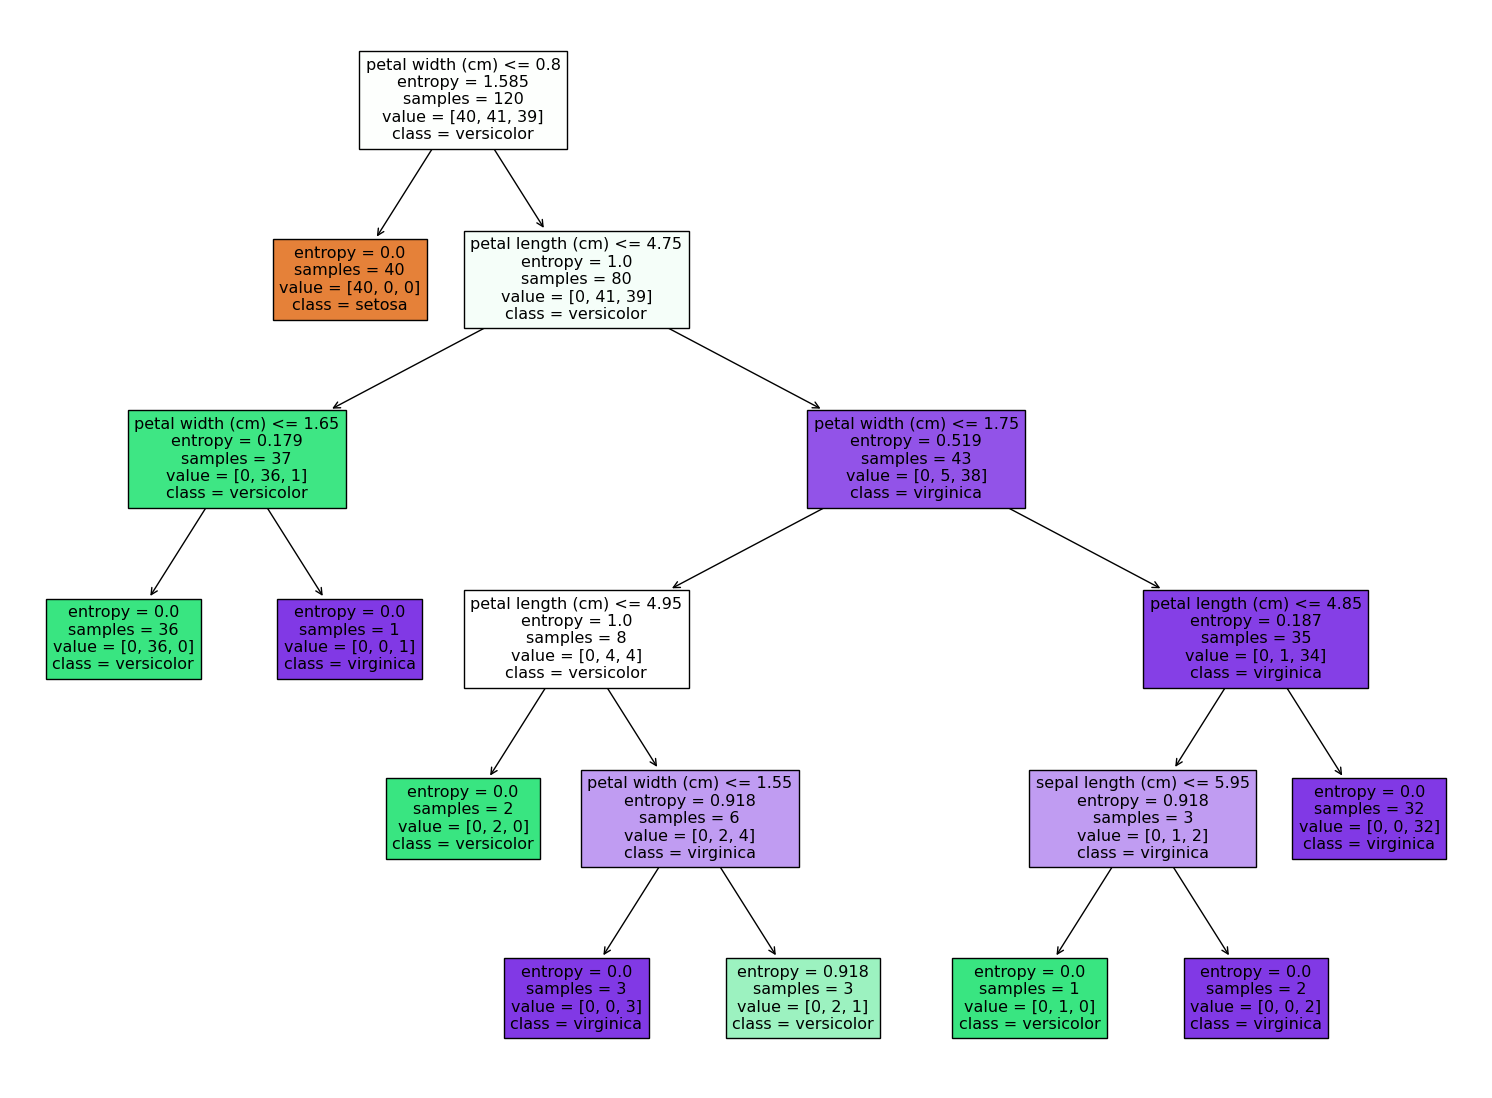

In [122]:
features = tree_df.columns[:-1]
classes =tree_df['Species'].unique().tolist()

from sklearn.tree import plot_tree
plt.figure(figsize=(19, 14))
plot_tree(pred_tree, feature_names=features, class_names=classes, filled=True)
plt.show()